In [1]:
!wget https://www.mydrive.ch/shares/43421/11a215a5749fcfb75e331ddd5f8e43ee/download/420938129-1629953099/pill.tar.xz

--2023-12-11 08:17:24--  https://www.mydrive.ch/shares/43421/11a215a5749fcfb75e331ddd5f8e43ee/download/420938129-1629953099/pill.tar.xz
Resolving www.mydrive.ch (www.mydrive.ch)... 91.214.169.64
Connecting to www.mydrive.ch (www.mydrive.ch)|91.214.169.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275267152 (263M) [application/x-xz]
Saving to: ‘pill.tar.xz’

pill.tar.xz         100%[===================>] 262.51M  27.9MB/s    in 11s     

2023-12-11 08:17:36 (24.6 MB/s) - ‘pill.tar.xz’ saved [275267152/275267152]



In [2]:
!tar -xf pill.tar.xz

In [3]:
import os
import random
import shutil

# Specify the folder path where the files are located
# Source directory containing the files you want to split
source_directory1 = '/content/pill/test/color'
source_directory2 = '/content/pill/test/combined'
source_directory3 = '/content/pill/test/crack'
source_directory4 = '/content/pill/test/faulty_imprint'
source_directory5 = '/content/pill/test/scratch'
source_directory6 = '/content/pill/test/contamination'

source_dir_list = [source_directory1, source_directory2, source_directory3, source_directory4, source_directory5, source_directory6]
for source_directory in source_dir_list:

    # Get a list of all files in the folder
    file_list = os.listdir(source_directory)

    # Define a new name format (e.g., prefix + index + extension)
    new_name_prefix = source_directory.split("/")[-1]
    index = 0  # Start index
    extension = '.png'  # Change this to the desired file extension

    # Iterate through the files and rename them
    for old_name in file_list:
        # Construct the new name for the file
        new_name = f"{new_name_prefix}_{index:03d}{extension}"  # 04d ensures 4-digit index

        # Create the full file paths for old and new names
        old_file_path = os.path.join(source_directory, old_name)
        new_file_path = os.path.join(source_directory, new_name)

        # Rename the file
        os.rename(old_file_path, new_file_path)

        # Increment the index for the next file
        index += 1

print("Files renamed successfully.")

Files renamed successfully.


In [4]:
# Destination directories for the two splits
destination_directory1 = '/content/pill/test/anomaly'
destination_directory2 = '/content/pill/train/anomaly'

os.makedirs(destination_directory1, exist_ok=True)
os.makedirs(destination_directory2, exist_ok=True)

# Probability of a file being placed in destination_directory1
split_ratio = 0.1  # You can adjust this as needed

for source_directory in source_dir_list:

    # Get a list of all files in the source directory
    file_list = os.listdir(source_directory)

    # Shuffle the list to randomize the file order
    random.shuffle(file_list)

    # Determine the number of files to put in each destination directory
    split_point = int(len(file_list) * split_ratio)

    # Copy files to the destination directories based on the split ratio
    for i, file_name in enumerate(file_list):
        source_file_path = os.path.join(source_directory, file_name)

        if i < split_point:
            destination_file_path = os.path.join(destination_directory1, file_name)
        else:
            destination_file_path = os.path.join(destination_directory2, file_name)

        # Copy the file to the appropriate destination
        shutil.copy(source_file_path, destination_file_path)

    print(f"Split {len(file_list)} files from {source_directory} into {split_point} files in {destination_directory1} and {len(file_list) - split_point} files in {destination_directory2}.")

Split 25 files from /content/pill/test/color into 2 files in /content/pill/test/anomaly and 23 files in /content/pill/train/anomaly.
Split 17 files from /content/pill/test/combined into 1 files in /content/pill/test/anomaly and 16 files in /content/pill/train/anomaly.
Split 26 files from /content/pill/test/crack into 2 files in /content/pill/test/anomaly and 24 files in /content/pill/train/anomaly.
Split 19 files from /content/pill/test/faulty_imprint into 1 files in /content/pill/test/anomaly and 18 files in /content/pill/train/anomaly.
Split 24 files from /content/pill/test/scratch into 2 files in /content/pill/test/anomaly and 22 files in /content/pill/train/anomaly.
Split 21 files from /content/pill/test/contamination into 2 files in /content/pill/test/anomaly and 19 files in /content/pill/train/anomaly.


In [5]:
folder_to_delet = source_dir_list.append('/content/pill/test/pill_type')
for source_directory in source_dir_list:

    # Specify the path to the folder you want to delete
    folder_to_delete = source_directory

    # Use shutil.rmtree() to delete the folder and its contents
    try:
        shutil.rmtree(folder_to_delete)
        print(f"Folder '{folder_to_delete}' and its contents have been successfully deleted.")
    except Exception as e:
        print(f"Error deleting folder: {e}")

Folder '/content/pill/test/color' and its contents have been successfully deleted.
Folder '/content/pill/test/combined' and its contents have been successfully deleted.
Folder '/content/pill/test/crack' and its contents have been successfully deleted.
Folder '/content/pill/test/faulty_imprint' and its contents have been successfully deleted.
Folder '/content/pill/test/scratch' and its contents have been successfully deleted.
Folder '/content/pill/test/contamination' and its contents have been successfully deleted.
Folder '/content/pill/test/pill_type' and its contents have been successfully deleted.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, EfficientNetB0, VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [7]:
train_dir = '/content/pill/train'
test_dir = '/content/pill/test'

In [8]:
BATCH_SIZE = 10
IMG_SIZE = (224, 224)

In [9]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 389 files belonging to 2 classes.


In [10]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                            shuffle=True,
                                                            batch_size=36,
                                                            image_size=IMG_SIZE)

Found 36 files belonging to 2 classes.


Δείξε τις 9 πρώτες εικόνες από το set εκπαίδευσης

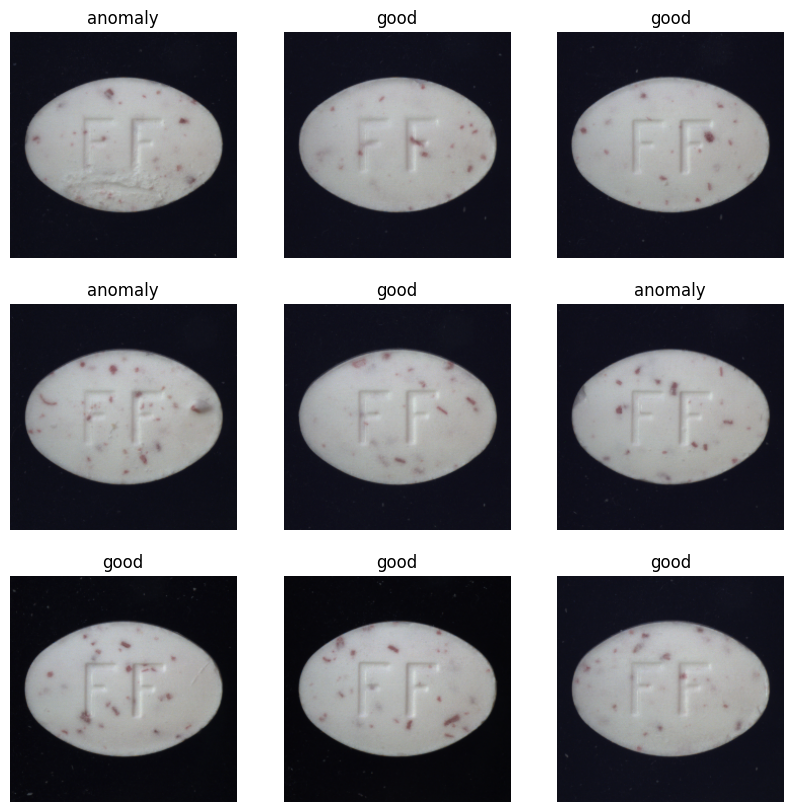

In [11]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Αλλαζουμε το fill mode σε nearest αντι του default mirror που θα βαλει στην εικόνα τις ακρές του χαπιού

In [13]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.RandomRotation(0.2, fill_mode='nearest'),
])

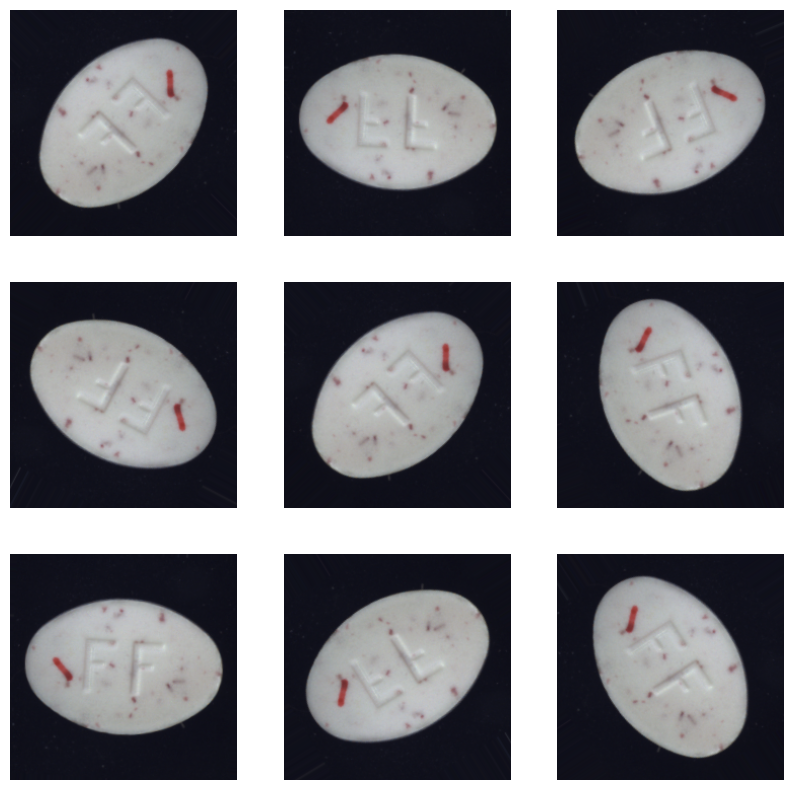

In [14]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [15]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [16]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

In [ ]:
base_model.trainable = False

In [ ]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
prediction_layer = Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(10, 1)


In [19]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.Flatten()(x)
x = Dense(1024)(x)
x = Dense(512)(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = Dense(1)(x)
model = tf.keras.Model(inputs, outputs)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                             

In [21]:
len(model.trainable_variables)

6

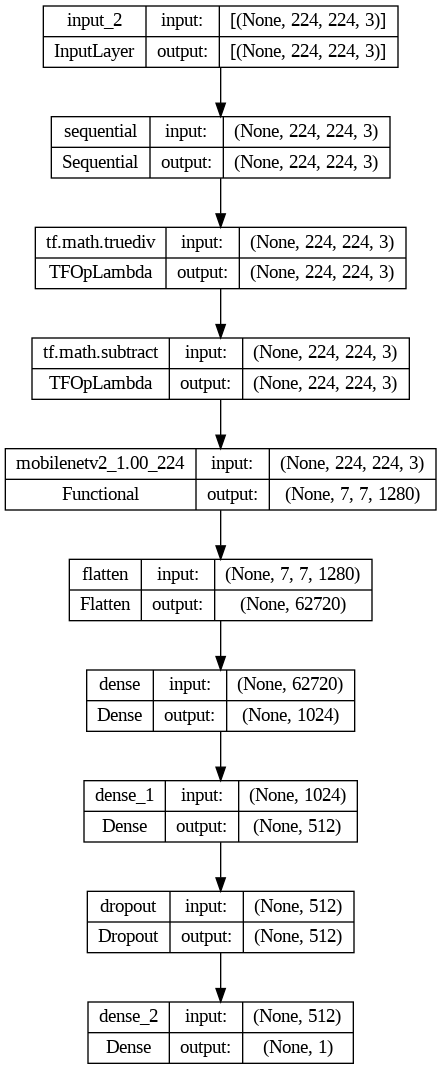

In [22]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.995:
                print("\nReached 99.5% accuracy so cancelling training!")

                # Stop training once the above condition is met
                self.model.stop_training = True

callbacks = myCallback()

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(test_dataset)

1/1 [==============================] - 2s 2s/step - loss: 0.5237 - accuracy: 0.8333


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.52
initial accuracy: 0.83


In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=test_dataset,
                    callbacks=[callbacks])

Epoch 1/10
39/39 [==============================] - 12s 152ms/step - loss: 8.0438 - accuracy: 0.6350 - val_loss: 1.3413 - val_accuracy: 0.8333
Epoch 2/10
39/39 [==============================] - 6s 132ms/step - loss: 3.4735 - accuracy: 0.7455 - val_loss: 7.7326 - val_accuracy: 0.7222
Epoch 3/10
39/39 [==============================] - 7s 162ms/step - loss: 4.4789 - accuracy: 0.7506 - val_loss: 1.9265 - val_accuracy: 0.7500
Epoch 4/10
39/39 [==============================] - 6s 130ms/step - loss: 2.6715 - accuracy: 0.8329 - val_loss: 1.0709 - val_accuracy: 0.8333
Epoch 5/10
39/39 [==============================] - 7s 164ms/step - loss: 4.3781 - accuracy: 0.7892 - val_loss: 1.7384 - val_accuracy: 0.7778
Epoch 6/10
39/39 [==============================] - 7s 147ms/step - loss: 1.9019 - accuracy: 0.8843 - val_loss: 3.5188 - val_accuracy: 0.7778
Epoch 7/10
39/39 [==============================] - 12s 227ms/step - loss: 0.7585 - accuracy: 0.9486 - val_loss: 1.7427 - val_accuracy: 0.7500
Epoc

In [ ]:
def graph(history, model):
    acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']

    loss = history.history['loss']
    test_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(test_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy for ' + model)

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(test_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0, 10.0])
    plt.title('Training and Validation Loss for ' + model)
    plt.xlabel('epoch')
    plt.show()

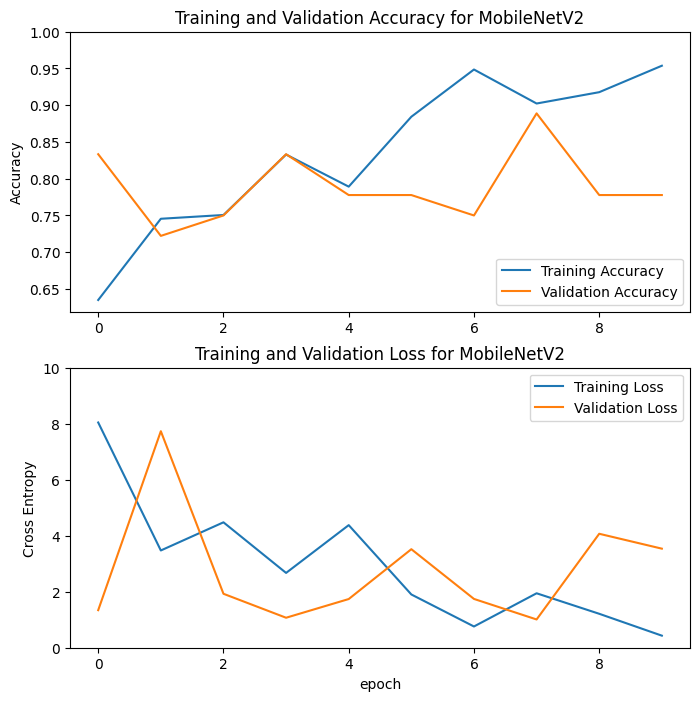

In [ ]:
graph(history, 'MobileNetV2')

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 120

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [ ]:
len(model.trainable_variables)

42

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset,
                         callbacks=[callbacks])

Epoch 10/20
39/39 [==============================] - 34s 358ms/step - loss: 1.6166 - accuracy: 0.9126 - val_loss: 1.3338 - val_accuracy: 0.8889
Epoch 11/20
39/39 [==============================] - 8s 182ms/step - loss: 0.3102 - accuracy: 0.9640 - val_loss: 5.4482 - val_accuracy: 0.6667
Epoch 12/20
39/39 [==============================] - 10s 204ms/step - loss: 0.5072 - accuracy: 0.9460 - val_loss: 1.9691 - val_accuracy: 0.8056
Epoch 13/20
39/39 [==============================] - 8s 163ms/step - loss: 0.3672 - accuracy: 0.9692 - val_loss: 3.9112 - val_accuracy: 0.7778
Epoch 14/20
39/39 [==============================] - 8s 173ms/step - loss: 0.3437 - accuracy: 0.9717 - val_loss: 2.2307 - val_accuracy: 0.8056
Epoch 15/20
39/39 [==============================] - 10s 196ms/step - loss: 0.2167 - accuracy: 0.9769 - val_loss: 5.8708 - val_accuracy: 0.6111
Epoch 16/20
39/39 [==============================] - 7s 154ms/step - loss: 0.2782 - accuracy: 0.9614 - val_loss: 10.2912 - val_accuracy: 0.

In [ ]:
acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

loss = history.history['loss']
test_loss = history.history['val_loss']

In [ ]:
def fine_tuned_graph(history_fine, acc, test_acc, loss, test_loss, model):
    acc += history_fine.history['accuracy']
    test_acc += history_fine.history['val_accuracy']

    loss += history_fine.history['loss']
    test_loss += history_fine.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(test_acc, label='Validation Accuracy')
    plt.ylim([0.5, 1])
    plt.plot([initial_epochs-1,initial_epochs-1],
        plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy for ' + model)

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(test_loss, label='Validation Loss')
    plt.ylim([0, 10.0])
    plt.plot([initial_epochs-1,initial_epochs-1],
        plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss for ' + model)
    plt.xlabel('epoch')
    plt.show()

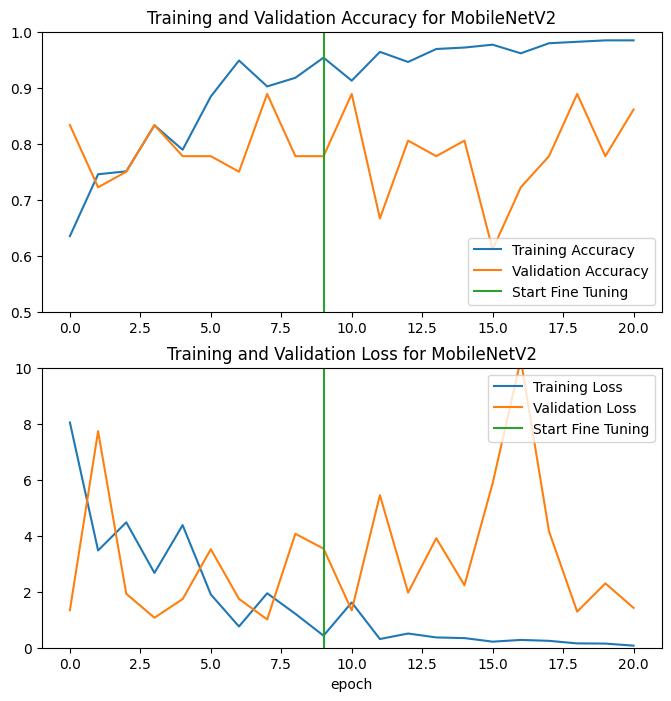

In [ ]:
fine_tuned_graph(history_fine, acc, test_acc, loss, test_loss, 'MobileNetV2')

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

1/1 [==============================] - 1s 561ms/step - loss: 1.4234 - accuracy: 0.8611
Test accuracy : 0.8611111044883728


Predictions:
 [1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0]
Labels:
 [1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0]


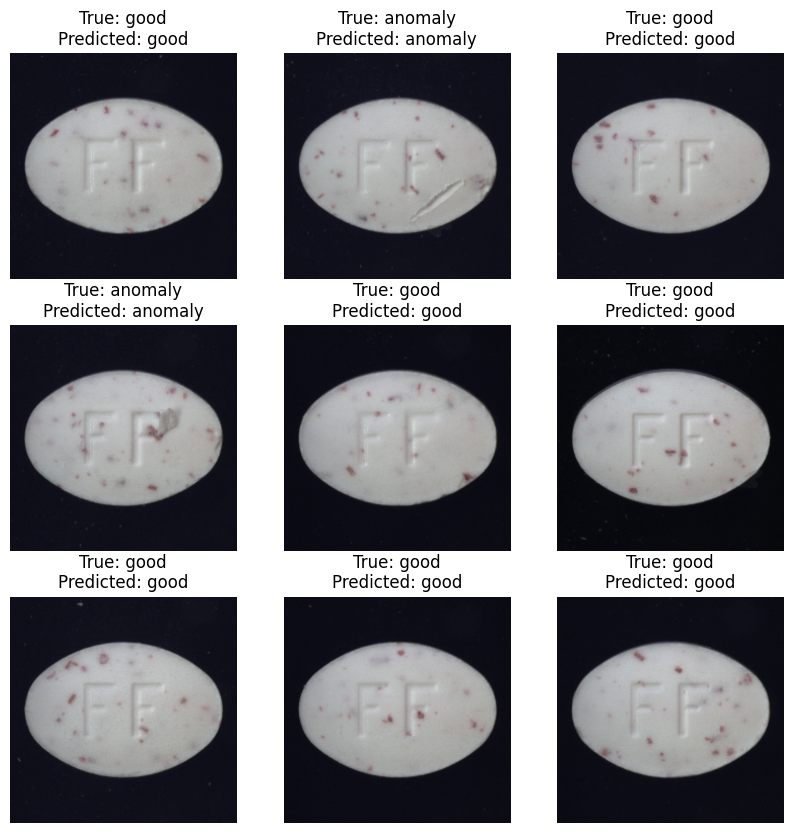

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  true_label = class_names[label_batch[i]]  # Get the true label
  predicted_label = class_names[predictions[i]]  # Get the predicted label
  title = f"True: {true_label}\nPredicted: {predicted_label}"
  plt.title(title)
  plt.axis("off")

Στατιστικα στοιχεία για το μοντέλο

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

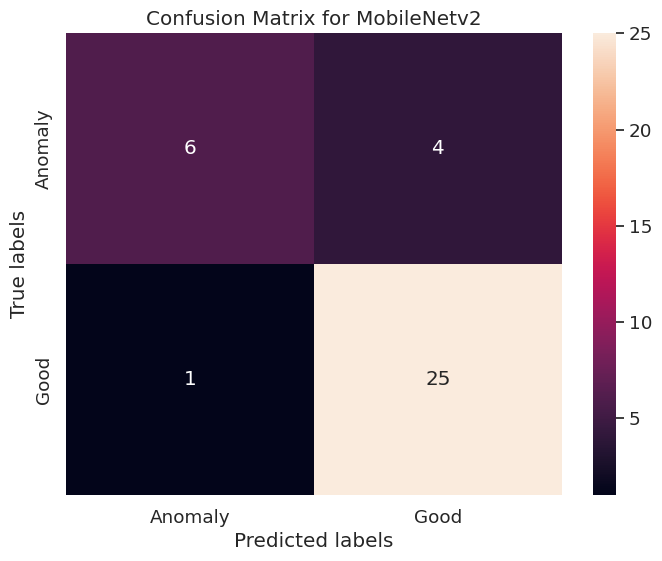

              precision    recall  f1-score   support

     Anomaly      0.857     0.600     0.706        10
        Good      0.862     0.962     0.909        26

    accuracy                          0.861        36
   macro avg      0.860     0.781     0.807        36
weighted avg      0.861     0.861     0.853        36



In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

confusion_mat = confusion_matrix(label_batch, predictions)
class_labels = ["Anomaly", "Good"]  # Replace with your class labels

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MobileNetv2')
plt.show()

print(classification_report(label_batch, predictions, digits=3, target_names=['Anomaly', 'Good']))

In [23]:
# Define the pre-trained models you want to compare
base_model1 = VGG16(input_shape=IMG_SHAPE, weights='imagenet', include_top=False)
base_model2 = ResNet50(input_shape=IMG_SHAPE, weights='imagenet', include_top=False)
base_model3 = InceptionV3(input_shape=IMG_SHAPE, weights='imagenet', include_top=False)
base_model4 = EfficientNetB0(input_shape=IMG_SHAPE, weights='imagenet', include_top=False)
base_model5 = VGG19(input_shape=IMG_SHAPE, weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [24]:
preprocess_input1 = tf.keras.applications.vgg16.preprocess_input
preprocess_input2 = tf.keras.applications.resnet50.preprocess_input
preprocess_input3 = tf.keras.applications.inception_v3.preprocess_input
preprocess_input4 = tf.keras.applications.efficientnet.preprocess_input
preprocess_input5 = tf.keras.applications.vgg19.preprocess_input

In [ ]:
image_batch1, label_batch1 = next(iter(train_dataset))
feature_batch1 = base_model1(image_batch1)
print(feature_batch1.shape)

(10, 7, 7, 512)


In [ ]:
image_batch2, label_batch2 = next(iter(train_dataset))
feature_batch2 = base_model2(image_batch2)
print(feature_batch2.shape)

(10, 7, 7, 2048)


In [ ]:
image_batch3, label_batch3 = next(iter(train_dataset))
feature_batch3 = base_model3(image_batch3)
print(feature_batch3.shape)

(10, 5, 5, 2048)


In [ ]:
image_batch4, label_batch4 = next(iter(train_dataset))
feature_batch4 = base_model4(image_batch4)
print(feature_batch4.shape)

(10, 7, 7, 1280)


In [ ]:
image_batch5, label_batch5 = next(iter(train_dataset))
feature_batch5 = base_model5(image_batch5)
print(feature_batch5.shape)

(10, 7, 7, 512)


In [25]:
base_model1.trainable = False
base_model2.trainable = False
base_model3.trainable = False
base_model4.trainable = False
base_model5.trainable = False

In [26]:
# Let's take a look at the base model architecture
base_model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [27]:
base_model2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [28]:
base_model3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [29]:
base_model4.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0

In [30]:
base_model5.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [31]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input1(x)
x = base_model1(x, training=False)
x = tf.keras.layers.Flatten()(x)
x = Dense(1024)(x)
x = Dense(512)(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = Dense(1)(x)
model1 = tf.keras.Model(inputs, outputs)

In [32]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input2(x)
x = base_model2(x, training=False)
x = tf.keras.layers.Flatten()(x)
x = Dense(1024)(x)
x = Dense(512)(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = Dense(1)(x)
model2 = tf.keras.Model(inputs, outputs)

In [33]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input3(x)
x = base_model3(x, training=False)
x = tf.keras.layers.Flatten()(x)
x = Dense(1024)(x)
x = Dense(512)(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = Dense(1)(x)
model3 = tf.keras.Model(inputs, outputs)

In [34]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input4(x)
x = base_model4(x, training=False)
x = tf.keras.layers.Flatten()(x)
x = Dense(1024)(x)
x = Dense(512)(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = Dense(1)(x)
model4 = tf.keras.Model(inputs, outputs)

In [35]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input5(x)
x = base_model5(x, training=False)
x = tf.keras.layers.Flatten()(x)
x = Dense(1024)(x)
x = Dense(512)(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = Dense(1)(x)
model5 = tf.keras.Model(inputs, outputs)

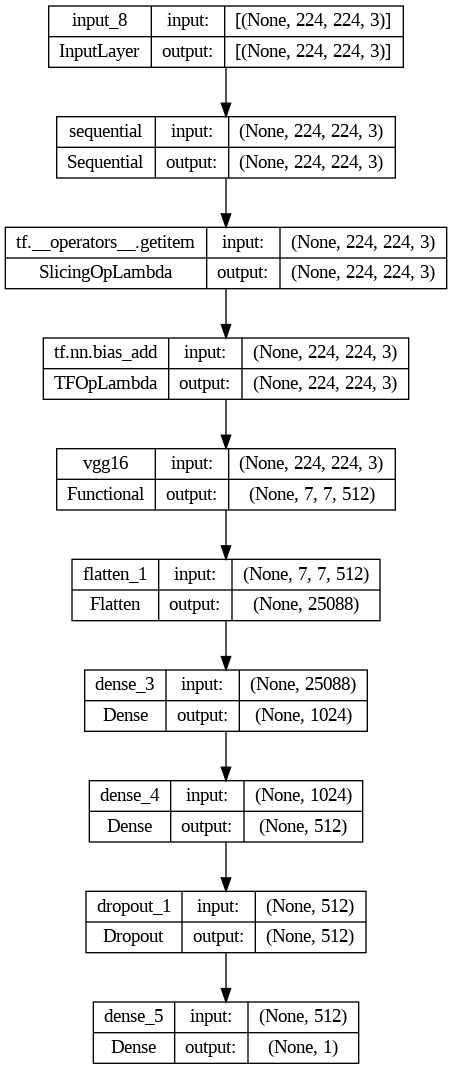

In [36]:
tf.keras.utils.plot_model(model1, show_shapes=True)

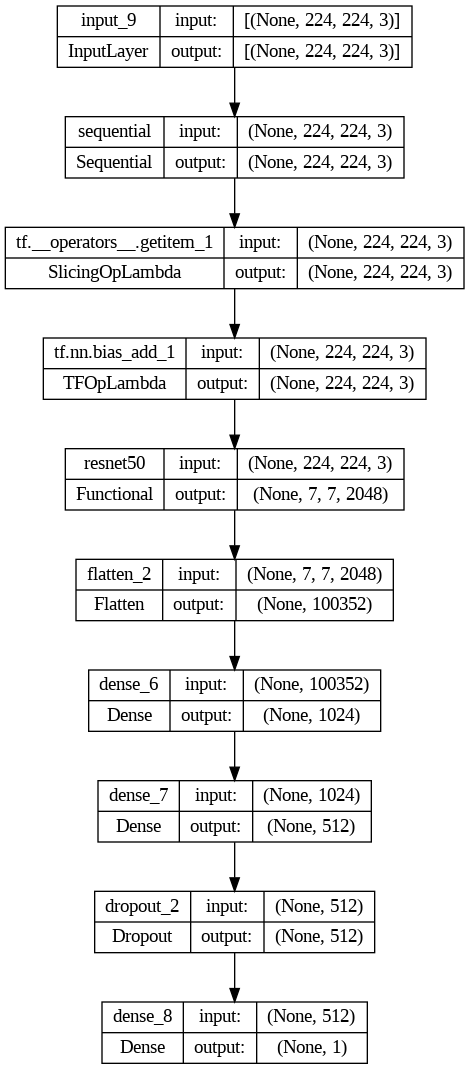

In [37]:
tf.keras.utils.plot_model(model2, show_shapes=True)

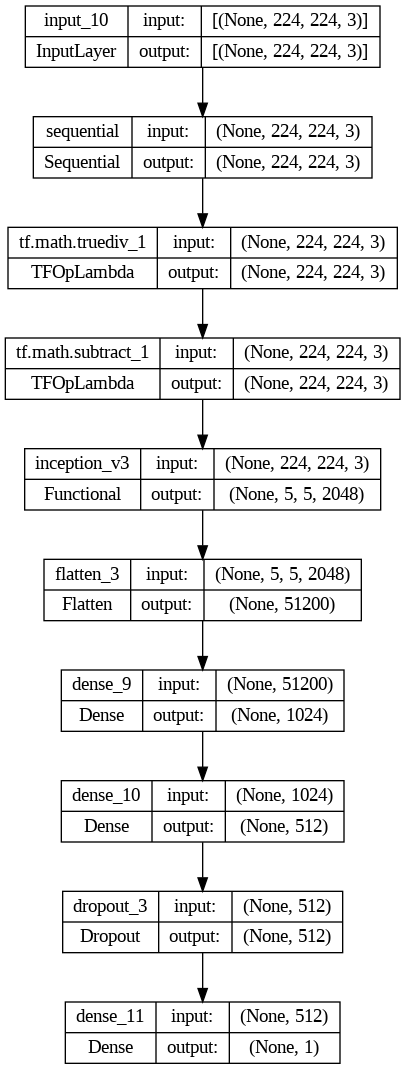

In [38]:
tf.keras.utils.plot_model(model3, show_shapes=True)

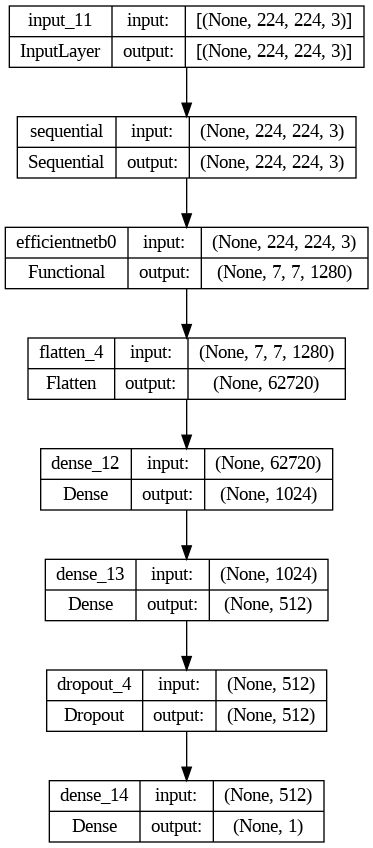

In [39]:
tf.keras.utils.plot_model(model4, show_shapes=True)

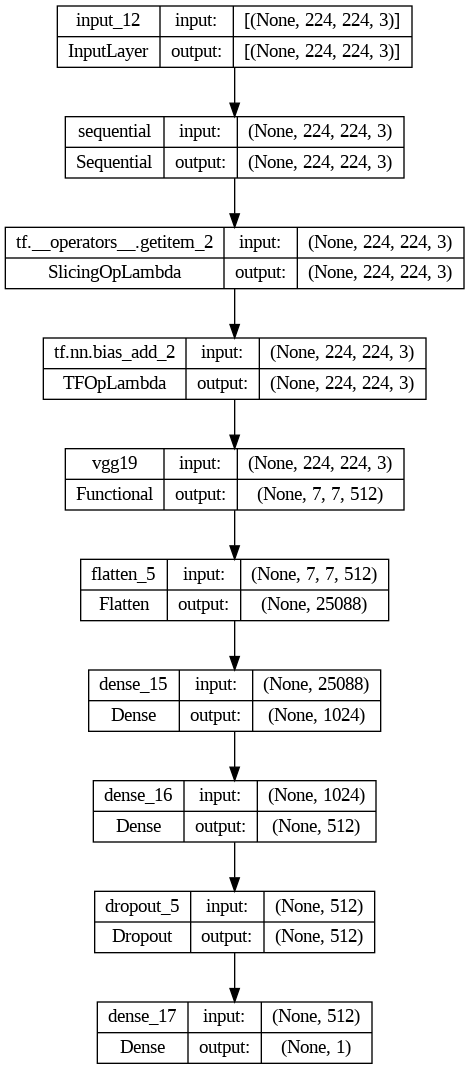

In [40]:
tf.keras.utils.plot_model(model5, show_shapes=True)

In [ ]:
base_learning_rate = 0.0001
model1.compile(optimizer=Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [ ]:
model2.compile(optimizer=Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [ ]:
model3.compile(optimizer=Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [ ]:
model4.compile(optimizer=Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [ ]:
model5.compile(optimizer=Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [ ]:
initial_epochs = 10

loss1, accuracy1 = model1.evaluate(test_dataset)

4/4 [==============================] - 5s 465ms/step - loss: 2.4495 - accuracy: 0.5278


In [ ]:
loss2, accuracy2 = model2.evaluate(test_dataset)

4/4 [==============================] - 3s 228ms/step - loss: 4.6546 - accuracy: 0.2778


In [ ]:
loss3, accuracy3 = model3.evaluate(test_dataset)

4/4 [==============================] - 6s 889ms/step - loss: 1.0224 - accuracy: 0.3889


In [ ]:
loss4, accuracy4 = model4.evaluate(test_dataset)

4/4 [==============================] - 4s 174ms/step - loss: 2.2474 - accuracy: 0.2778


In [ ]:
loss5, accuracy5 = model5.evaluate(test_dataset)

4/4 [==============================] - 1s 66ms/step - loss: 1.5970 - accuracy: 0.5556


In [ ]:
print("initial loss: {:.2f}".format(loss1))
print("initial accuracy: {:.2f}".format(accuracy1))

initial loss: 2.45
initial accuracy: 0.53


In [ ]:
print("initial loss: {:.2f}".format(loss2))
print("initial accuracy: {:.2f}".format(accuracy2))

initial loss: 4.65
initial accuracy: 0.28


In [ ]:
print("initial loss: {:.2f}".format(loss3))
print("initial accuracy: {:.2f}".format(accuracy3))

initial loss: 1.02
initial accuracy: 0.39


In [ ]:
print("initial loss: {:.2f}".format(loss4))
print("initial accuracy: {:.2f}".format(accuracy4))

initial loss: 2.25
initial accuracy: 0.28


In [ ]:
print("initial loss: {:.2f}".format(loss5))
print("initial accuracy: {:.2f}".format(accuracy5))

initial loss: 1.60
initial accuracy: 0.56


In [ ]:
history1 = model1.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=test_dataset,
                    callbacks=[callbacks])

Epoch 1/10
39/39 [==============================] - 18s 329ms/step - loss: 13.9062 - accuracy: 0.6041 - val_loss: 5.8281 - val_accuracy: 0.6111
Epoch 2/10
39/39 [==============================] - 7s 140ms/step - loss: 3.5195 - accuracy: 0.8329 - val_loss: 1.4301 - val_accuracy: 0.9167
Epoch 3/10
39/39 [==============================] - 8s 173ms/step - loss: 3.8899 - accuracy: 0.8303 - val_loss: 0.4159 - val_accuracy: 0.9444
Epoch 4/10
39/39 [==============================] - 7s 145ms/step - loss: 1.3233 - accuracy: 0.9203 - val_loss: 0.6966 - val_accuracy: 0.8889
Epoch 5/10
39/39 [==============================] - 7s 140ms/step - loss: 1.4402 - accuracy: 0.9254 - val_loss: 0.6492 - val_accuracy: 0.9444
Epoch 6/10
39/39 [==============================] - 7s 163ms/step - loss: 0.6287 - accuracy: 0.9434 - val_loss: 1.7058 - val_accuracy: 0.8889
Epoch 7/10
39/39 [==============================] - 6s 138ms/step - loss: 0.9506 - accuracy: 0.9409 - val_loss: 0.0459 - val_accuracy: 0.9722
Epoc

In [ ]:
history2 = model2.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=test_dataset,
                    callbacks=[callbacks])

Epoch 1/10
39/39 [==============================] - 24s 252ms/step - loss: 19.5967 - accuracy: 0.6015 - val_loss: 1.4608 - val_accuracy: 0.8611
Epoch 2/10
39/39 [==============================] - 7s 164ms/step - loss: 7.6642 - accuracy: 0.7224 - val_loss: 1.9266 - val_accuracy: 0.8611
Epoch 3/10
39/39 [==============================] - 7s 140ms/step - loss: 4.0609 - accuracy: 0.8149 - val_loss: 1.5657 - val_accuracy: 0.8889
Epoch 4/10
39/39 [==============================] - 8s 171ms/step - loss: 6.4088 - accuracy: 0.7866 - val_loss: 2.0702 - val_accuracy: 0.8611
Epoch 5/10
39/39 [==============================] - 10s 200ms/step - loss: 3.7575 - accuracy: 0.8560 - val_loss: 6.0020 - val_accuracy: 0.7778
Epoch 6/10
39/39 [==============================] - 7s 140ms/step - loss: 2.2876 - accuracy: 0.8946 - val_loss: 2.1943 - val_accuracy: 0.9167
Epoch 7/10
39/39 [==============================] - 8s 172ms/step - loss: 3.4614 - accuracy: 0.8843 - val_loss: 1.2238 - val_accuracy: 0.9167
Epo

In [ ]:
history3 = model3.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=test_dataset,
                    callbacks=[callbacks])

Epoch 1/10
39/39 [==============================] - 18s 280ms/step - loss: 8.9828 - accuracy: 0.6041 - val_loss: 4.9614 - val_accuracy: 0.7500
Epoch 2/10
39/39 [==============================] - 6s 135ms/step - loss: 6.8936 - accuracy: 0.6838 - val_loss: 1.7760 - val_accuracy: 0.7500
Epoch 3/10
39/39 [==============================] - 7s 147ms/step - loss: 3.4261 - accuracy: 0.7378 - val_loss: 2.5561 - val_accuracy: 0.5556
Epoch 4/10
39/39 [==============================] - 7s 157ms/step - loss: 3.4273 - accuracy: 0.7789 - val_loss: 2.4530 - val_accuracy: 0.6944
Epoch 5/10
39/39 [==============================] - 6s 137ms/step - loss: 2.9182 - accuracy: 0.7995 - val_loss: 6.0967 - val_accuracy: 0.7778
Epoch 6/10
39/39 [==============================] - 8s 162ms/step - loss: 3.0666 - accuracy: 0.8072 - val_loss: 2.8913 - val_accuracy: 0.7500
Epoch 7/10
39/39 [==============================] - 7s 156ms/step - loss: 1.2871 - accuracy: 0.8946 - val_loss: 3.5971 - val_accuracy: 0.6111
Epoch

In [ ]:
history4 = model4.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=test_dataset,
                    callbacks=[callbacks])

Epoch 1/10
39/39 [==============================] - 24s 268ms/step - loss: 8.1507 - accuracy: 0.6247 - val_loss: 3.2359 - val_accuracy: 0.7500
Epoch 2/10
39/39 [==============================] - 15s 333ms/step - loss: 3.2910 - accuracy: 0.7275 - val_loss: 0.3579 - val_accuracy: 0.8611
Epoch 3/10
39/39 [==============================] - 8s 169ms/step - loss: 3.1269 - accuracy: 0.7352 - val_loss: 4.6198 - val_accuracy: 0.7500
Epoch 4/10
39/39 [==============================] - 11s 249ms/step - loss: 3.7054 - accuracy: 0.7686 - val_loss: 2.2926 - val_accuracy: 0.8056
Epoch 5/10
39/39 [==============================] - 9s 184ms/step - loss: 2.3140 - accuracy: 0.8021 - val_loss: 1.2953 - val_accuracy: 0.8333
Epoch 6/10
39/39 [==============================] - 6s 135ms/step - loss: 2.6519 - accuracy: 0.8355 - val_loss: 0.8657 - val_accuracy: 0.8611
Epoch 7/10
39/39 [==============================] - 7s 165ms/step - loss: 2.0023 - accuracy: 0.8432 - val_loss: 0.9885 - val_accuracy: 0.8333
Epo

In [ ]:
history5 = model5.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=test_dataset,
                    callbacks=[callbacks])

Epoch 1/10
39/39 [==============================] - 17s 311ms/step - loss: 11.7975 - accuracy: 0.6144 - val_loss: 8.7297 - val_accuracy: 0.4722
Epoch 2/10
39/39 [==============================] - 13s 272ms/step - loss: 2.7758 - accuracy: 0.8098 - val_loss: 1.9387 - val_accuracy: 0.8056
Epoch 3/10
39/39 [==============================] - 12s 270ms/step - loss: 1.8247 - accuracy: 0.8715 - val_loss: 0.9498 - val_accuracy: 0.8889
Epoch 4/10
39/39 [==============================] - 7s 164ms/step - loss: 1.5206 - accuracy: 0.8792 - val_loss: 2.4229 - val_accuracy: 0.7778
Epoch 5/10
39/39 [==============================] - 9s 197ms/step - loss: 2.0821 - accuracy: 0.8715 - val_loss: 1.5878 - val_accuracy: 0.9167
Epoch 6/10
39/39 [==============================] - 10s 203ms/step - loss: 1.9296 - accuracy: 0.9126 - val_loss: 2.1221 - val_accuracy: 0.8056
Epoch 7/10
39/39 [==============================] - 8s 181ms/step - loss: 2.8768 - accuracy: 0.8715 - val_loss: 0.9041 - val_accuracy: 0.9167
E

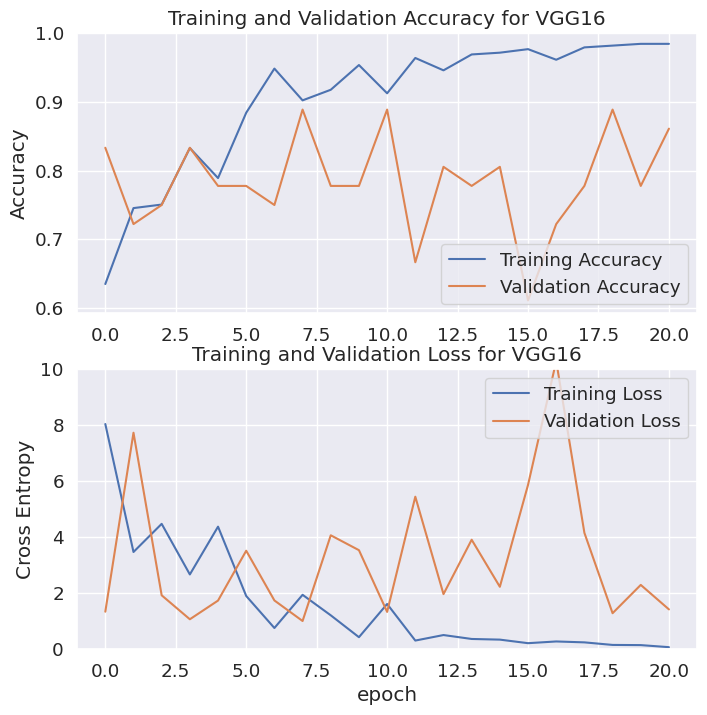

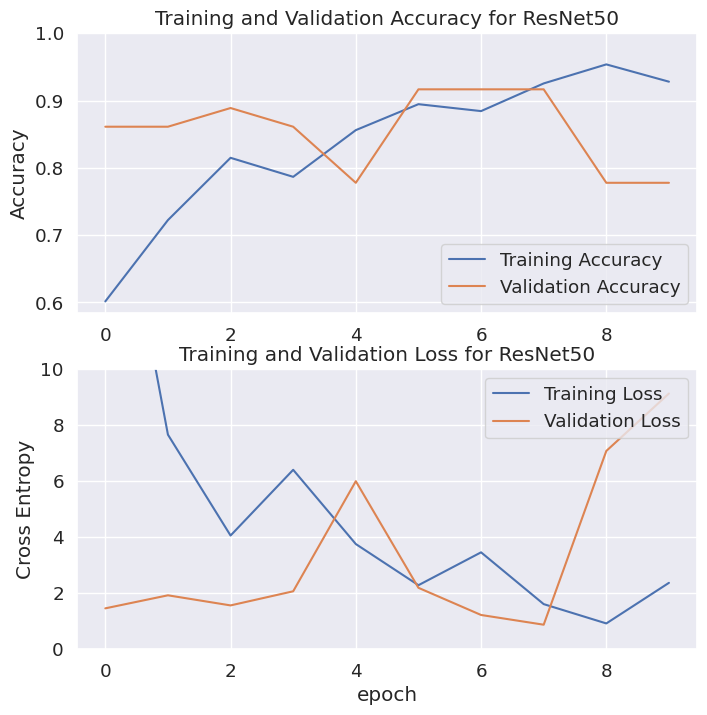

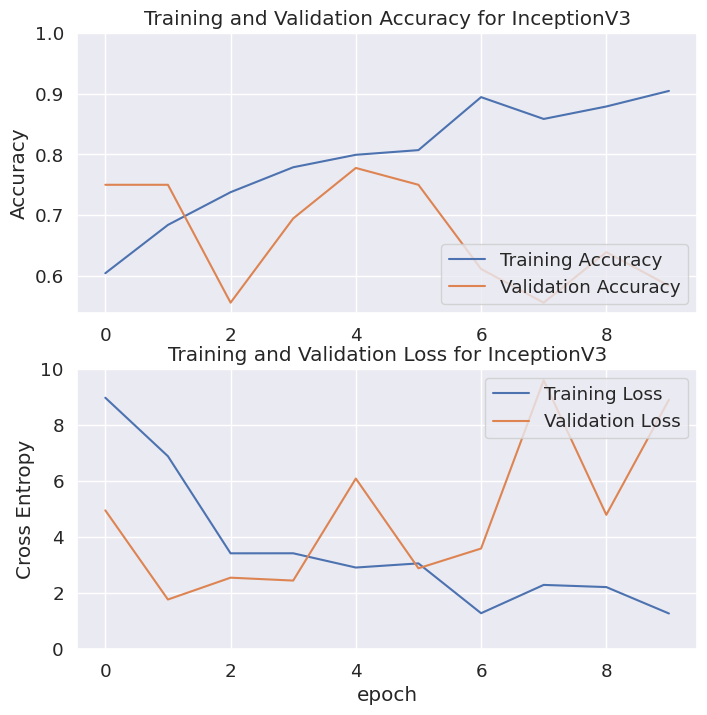

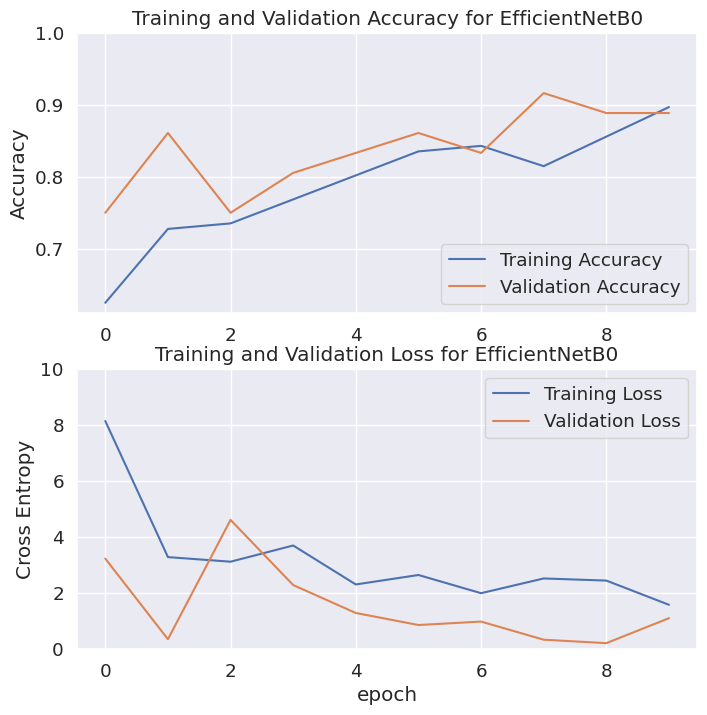

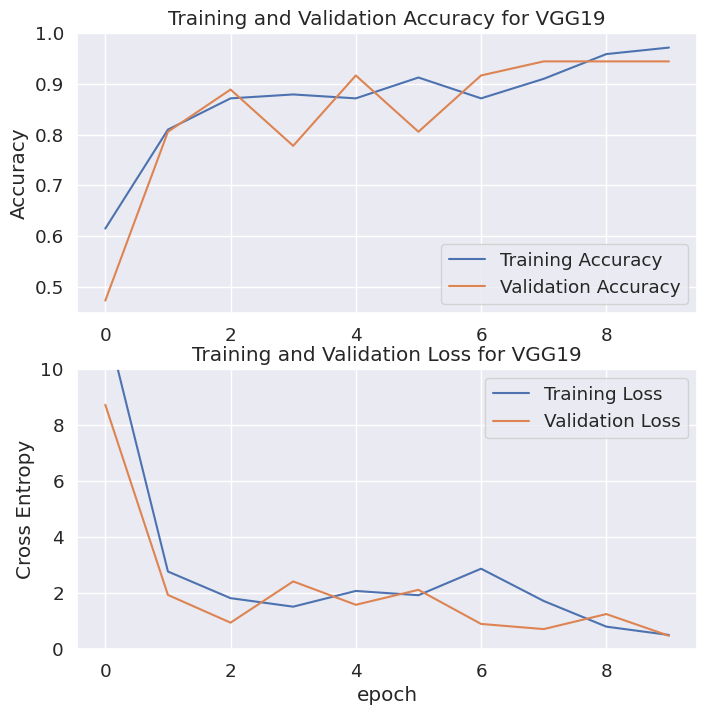

In [ ]:
graph(history, 'VGG16')
graph(history2, 'ResNet50')
graph(history3, 'InceptionV3')
graph(history4, 'EfficientNetB0')
graph(history5, 'VGG19')

In [ ]:
base_model1.trainable = True
base_model2.trainable = True
base_model3.trainable = True
base_model4.trainable = True
base_model5.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model1.layers))

# Fine-tune from this layer onwards
fine_tune_at = 16

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model1.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  19


In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model2.layers))

# Fine-tune from this layer onwards
fine_tune_at = 169

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model2.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  175


In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model3.layers))

# Fine-tune from this layer onwards
fine_tune_at = 294

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model3.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  311


In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model4.layers))

# Fine-tune from this layer onwards
fine_tune_at = 230

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model4.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  238


In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model5.layers))

# Fine-tune from this layer onwards
fine_tune_at = 17

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model5.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  22


In [ ]:
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [ ]:
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [ ]:
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [ ]:
model4.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [ ]:
model5.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine1 = model1.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset,
                         callbacks=[callbacks])

Epoch 10/20
39/39 [==============================] - 9s 164ms/step - loss: 1.1801 - accuracy: 0.9563 - val_loss: 0.1482 - val_accuracy: 0.9722
Epoch 11/20
39/39 [==============================] - 6s 137ms/step - loss: 0.6482 - accuracy: 0.9717 - val_loss: 1.6736 - val_accuracy: 0.9167
Epoch 12/20
39/39 [==============================] - 8s 168ms/step - loss: 0.1012 - accuracy: 0.9846 - val_loss: 3.2272 - val_accuracy: 0.9167
Epoch 13/20
39/39 [==============================] - ETA: 0s - loss: 0.0385 - accuracy: 0.9974
Reached 99.5% accuracy so cancelling training!
39/39 [==============================] - 7s 141ms/step - loss: 0.0385 - accuracy: 0.9974 - val_loss: 0.6254 - val_accuracy: 0.9444


In [ ]:
history_fine2 = model2.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset,
                         callbacks=[callbacks])

Epoch 10/20
39/39 [==============================] - 13s 193ms/step - loss: 0.5174 - accuracy: 0.9794 - val_loss: 2.4562 - val_accuracy: 0.8889
Epoch 11/20
39/39 [==============================] - 6s 136ms/step - loss: 0.2755 - accuracy: 0.9794 - val_loss: 2.0183 - val_accuracy: 0.9444
Epoch 12/20
39/39 [==============================] - 6s 136ms/step - loss: 0.2620 - accuracy: 0.9871 - val_loss: 5.4111 - val_accuracy: 0.8611
Epoch 13/20
39/39 [==============================] - 7s 166ms/step - loss: 0.0788 - accuracy: 0.9846 - val_loss: 2.0634 - val_accuracy: 0.9167
Epoch 14/20
39/39 [==============================] - 6s 136ms/step - loss: 0.1812 - accuracy: 0.9871 - val_loss: 3.8481 - val_accuracy: 0.9167
Epoch 15/20
39/39 [==============================] - 8s 148ms/step - loss: 0.2555 - accuracy: 0.9871 - val_loss: 2.3546 - val_accuracy: 0.9167
Epoch 16/20
39/39 [==============================] - 7s 158ms/step - loss: 0.1339 - accuracy: 0.9871 - val_loss: 3.2095 - val_accuracy: 0.916

In [ ]:
history_fine3 = model3.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset,
                         callbacks=[callbacks])

Epoch 10/20
39/39 [==============================] - 14s 193ms/step - loss: 0.7979 - accuracy: 0.9229 - val_loss: 5.8971 - val_accuracy: 0.6944
Epoch 11/20
39/39 [==============================] - 7s 156ms/step - loss: 0.4446 - accuracy: 0.9512 - val_loss: 5.5181 - val_accuracy: 0.6944
Epoch 12/20
39/39 [==============================] - 9s 200ms/step - loss: 0.2497 - accuracy: 0.9769 - val_loss: 4.7017 - val_accuracy: 0.6944
Epoch 13/20
39/39 [==============================] - 7s 163ms/step - loss: 0.2550 - accuracy: 0.9666 - val_loss: 6.1825 - val_accuracy: 0.6944
Epoch 14/20
39/39 [==============================] - 6s 133ms/step - loss: 0.1990 - accuracy: 0.9820 - val_loss: 4.9100 - val_accuracy: 0.6667
Epoch 15/20
39/39 [==============================] - 7s 143ms/step - loss: 0.3489 - accuracy: 0.9717 - val_loss: 4.7084 - val_accuracy: 0.6944
Epoch 16/20
39/39 [==============================] - 7s 143ms/step - loss: 0.0802 - accuracy: 0.9897 - val_loss: 4.6561 - val_accuracy: 0.694

In [ ]:
history_fine4 = model4.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset,
                         callbacks=[callbacks])

Epoch 10/20
39/39 [==============================] - 17s 207ms/step - loss: 0.8781 - accuracy: 0.9254 - val_loss: 0.5168 - val_accuracy: 0.9444
Epoch 11/20
39/39 [==============================] - 6s 132ms/step - loss: 0.9404 - accuracy: 0.9254 - val_loss: 0.8768 - val_accuracy: 0.8889
Epoch 12/20
39/39 [==============================] - 7s 165ms/step - loss: 0.5562 - accuracy: 0.9563 - val_loss: 0.7562 - val_accuracy: 0.8889
Epoch 13/20
39/39 [==============================] - 6s 131ms/step - loss: 0.4550 - accuracy: 0.9486 - val_loss: 0.3988 - val_accuracy: 0.9167
Epoch 14/20
39/39 [==============================] - 7s 162ms/step - loss: 0.4943 - accuracy: 0.9460 - val_loss: 0.3043 - val_accuracy: 0.9444
Epoch 15/20
39/39 [==============================] - 6s 133ms/step - loss: 0.4136 - accuracy: 0.9589 - val_loss: 0.3486 - val_accuracy: 0.9444
Epoch 16/20
39/39 [==============================] - 7s 149ms/step - loss: 0.2130 - accuracy: 0.9692 - val_loss: 0.3603 - val_accuracy: 0.944

In [ ]:
history_fine5 = model5.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset,
                         callbacks=[callbacks])

Epoch 10/20
39/39 [==============================] - 10s 167ms/step - loss: 2.2980 - accuracy: 0.9409 - val_loss: 0.6377 - val_accuracy: 0.9444
Epoch 11/20
39/39 [==============================] - 7s 144ms/step - loss: 0.6304 - accuracy: 0.9409 - val_loss: 1.8165 - val_accuracy: 0.9444
Epoch 12/20
39/39 [==============================] - 9s 207ms/step - loss: 0.4929 - accuracy: 0.9589 - val_loss: 1.0837 - val_accuracy: 0.8611
Epoch 13/20
39/39 [==============================] - 7s 148ms/step - loss: 0.3585 - accuracy: 0.9743 - val_loss: 2.6235 - val_accuracy: 0.8611
Epoch 14/20
39/39 [==============================] - 8s 175ms/step - loss: 0.1069 - accuracy: 0.9846 - val_loss: 1.1869 - val_accuracy: 0.9167
Epoch 15/20
39/39 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9974
Reached 99.5% accuracy so cancelling training!
39/39 [==============================] - 7s 153ms/step - loss: 0.0035 - accuracy: 0.9974 - val_loss: 0.6864 - val_accuracy: 0.9444


In [ ]:
acc1 = history1.history['accuracy']
test_acc1 = history1.history['val_accuracy']

loss1 = history1.history['loss']
test_loss1 = history1.history['val_loss']



acc2 = history2.history['accuracy']
test_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
test_loss2 = history2.history['val_loss']



acc3 = history3.history['accuracy']
test_acc3 = history3.history['val_accuracy']

loss3 = history3.history['loss']
test_loss3 = history3.history['val_loss']



acc4 = history4.history['accuracy']
test_acc4 = history4.history['val_accuracy']

loss4 = history4.history['loss']
test_loss4 = history4.history['val_loss']



acc5 = history5.history['accuracy']
test_acc5 = history5.history['val_accuracy']

loss5 = history5.history['loss']
test_loss5 = history5.history['val_loss']

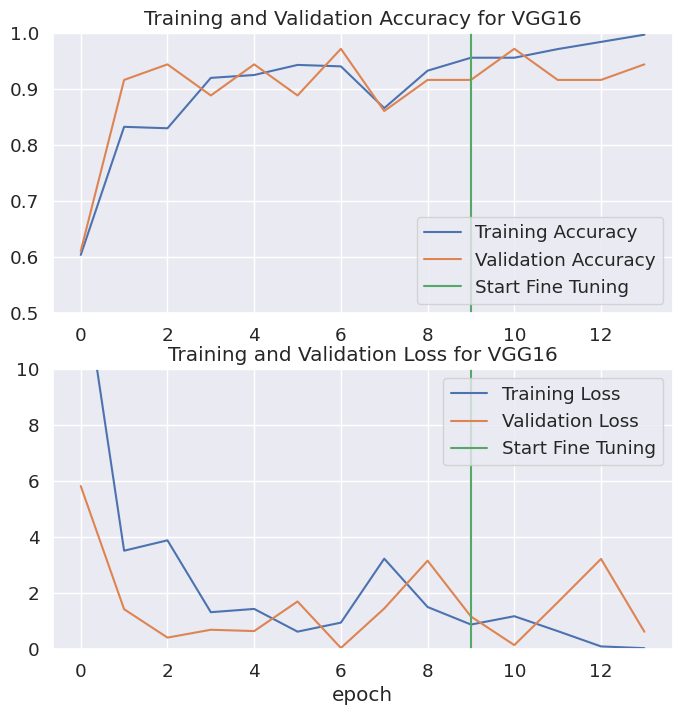

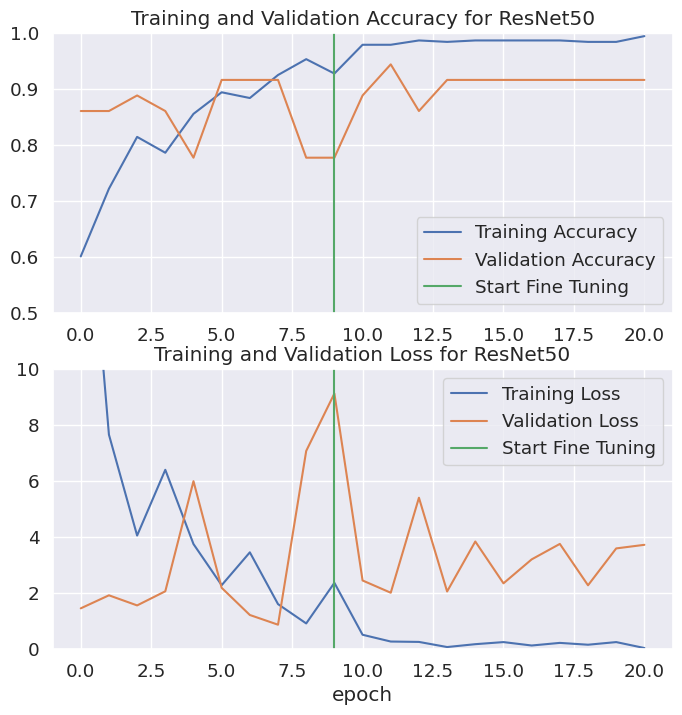

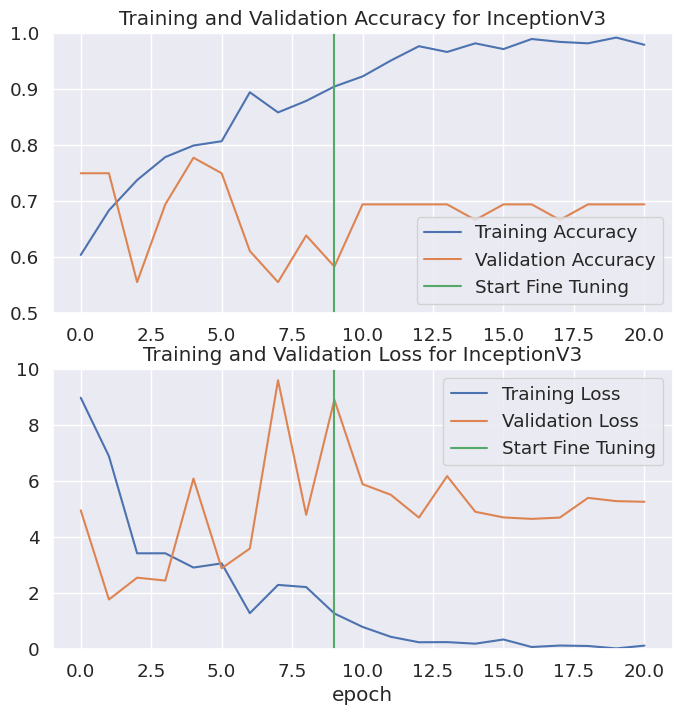

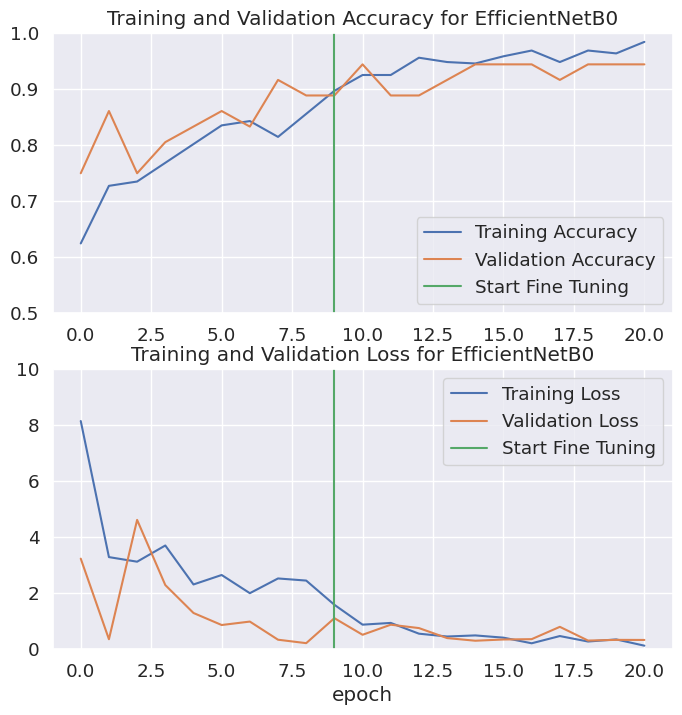

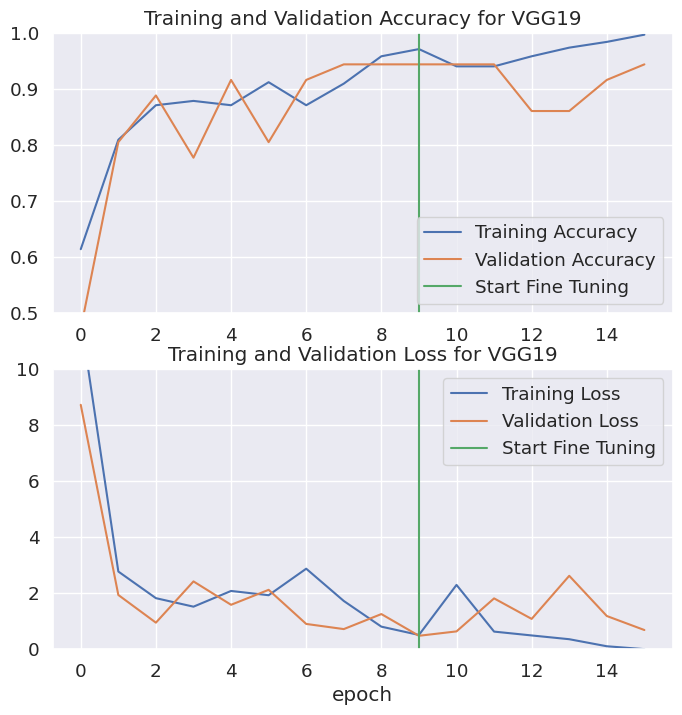

In [ ]:
fine_tuned_graph(history_fine1, acc1, test_acc1, loss1, test_loss1, 'VGG16')
fine_tuned_graph(history_fine2, acc2, test_acc2, loss2, test_loss2, 'ResNet50')
fine_tuned_graph(history_fine3, acc3, test_acc3, loss3, test_loss3, 'InceptionV3')
fine_tuned_graph(history_fine4, acc4, test_acc4, loss4, test_loss4, 'EfficientNetB0')
fine_tuned_graph(history_fine5, acc5, test_acc5, loss5, test_loss5, 'VGG19')

In [ ]:
loss, accuracy = model1.evaluate(test_dataset)
print('Test accuracy for VGG16 :', accuracy)

1/1 [==============================] - 1s 659ms/step - loss: 0.6254 - accuracy: 0.9444
Test accuracy : 0.9444444179534912


In [ ]:
loss, accuracy = model2.evaluate(test_dataset)
print('Test accuracy ResNet50 :', accuracy)

1/1 [==============================] - 1s 574ms/step - loss: 3.7297 - accuracy: 0.9167
Test accuracy : 0.9166666865348816


In [ ]:
loss, accuracy = model3.evaluate(test_dataset)
print('Test accuracy InceptionV3:', accuracy)

1/1 [==============================] - 1s 566ms/step - loss: 5.2668 - accuracy: 0.6944
Test accuracy : 0.6944444179534912


In [ ]:
loss, accuracy = model4.evaluate(test_dataset)
print('Test accuracy EfficientNetB0:', accuracy)

1/1 [==============================] - 1s 570ms/step - loss: 0.3322 - accuracy: 0.9444
Test accuracy : 0.9444444179534912


In [ ]:
loss, accuracy = model5.evaluate(test_dataset)
print('Test accuracy VGG19:', accuracy)

1/1 [==============================] - 1s 715ms/step - loss: 0.6864 - accuracy: 0.9444
Test accuracy : 0.9444444179534912


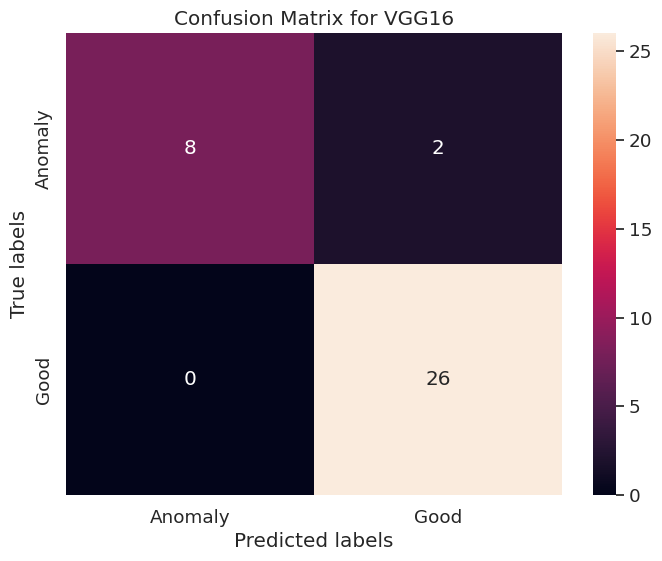

              precision    recall  f1-score   support

     Anomaly      1.000     0.800     0.889        10
        Good      0.929     1.000     0.963        26

    accuracy                          0.944        36
   macro avg      0.964     0.900     0.926        36
weighted avg      0.948     0.944     0.942        36



In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model1.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

confusion_mat = confusion_matrix(label_batch, predictions)
class_labels = ["Anomaly", "Good"]  # Replace with your class labels

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for VGG16')
plt.show()

print(classification_report(label_batch, predictions, digits=3, target_names=['Anomaly', 'Good']))

Predictions:
 [0 0 0 1 1 1 1 0 1 1]
Labels:
 [0 0 0 1 1 0 1 0 1 1]


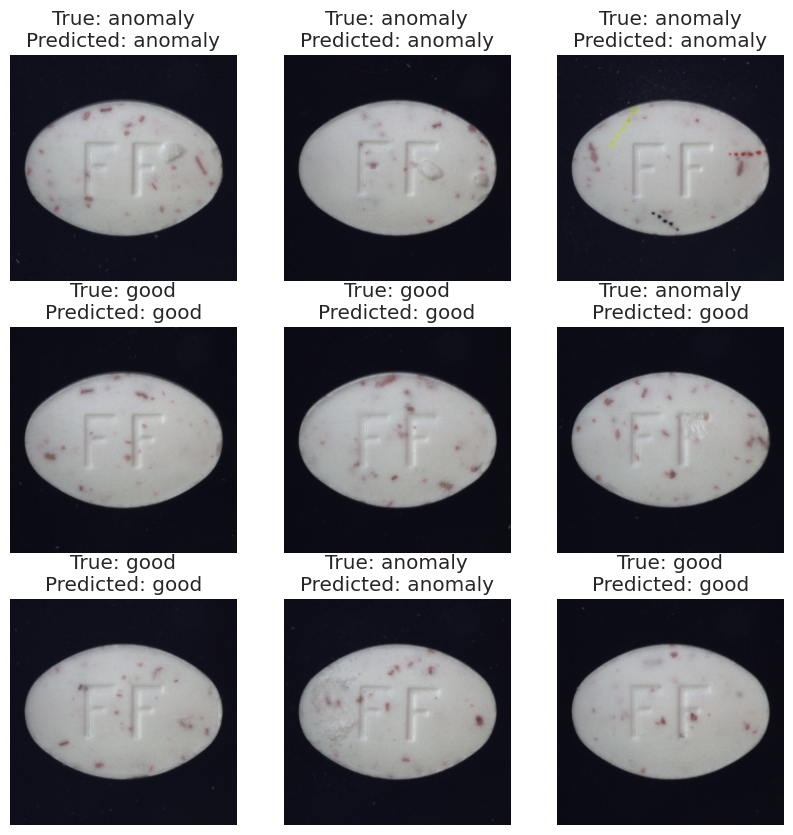

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model1.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  true_label = class_names[label_batch[i]]  # Get the true label
  predicted_label = class_names[predictions[i]]  # Get the predicted label
  title = f"True: {true_label}\nPredicted: {predicted_label}"
  plt.title(title)
  plt.axis("off")

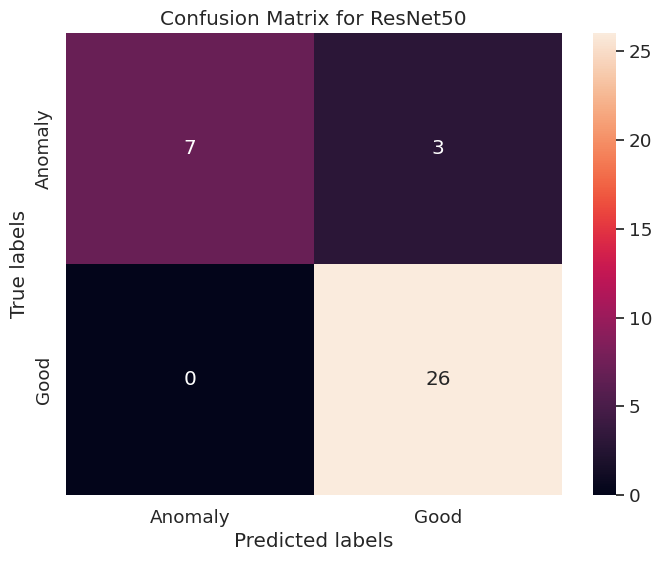

              precision    recall  f1-score   support

     Anomaly      1.000     0.700     0.824        10
        Good      0.897     1.000     0.945        26

    accuracy                          0.917        36
   macro avg      0.948     0.850     0.884        36
weighted avg      0.925     0.917     0.912        36



In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model2.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

confusion_mat = confusion_matrix(label_batch, predictions)
class_labels = ["Anomaly", "Good"]  # Replace with your class labels

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for ResNet50')
plt.show()

print(classification_report(label_batch, predictions, digits=3, target_names=['Anomaly', 'Good']))

Predictions:
 [1 1 0 1 0 0 1 1 1 1]
Labels:
 [1 0 1 1 0 0 1 1 1 1]


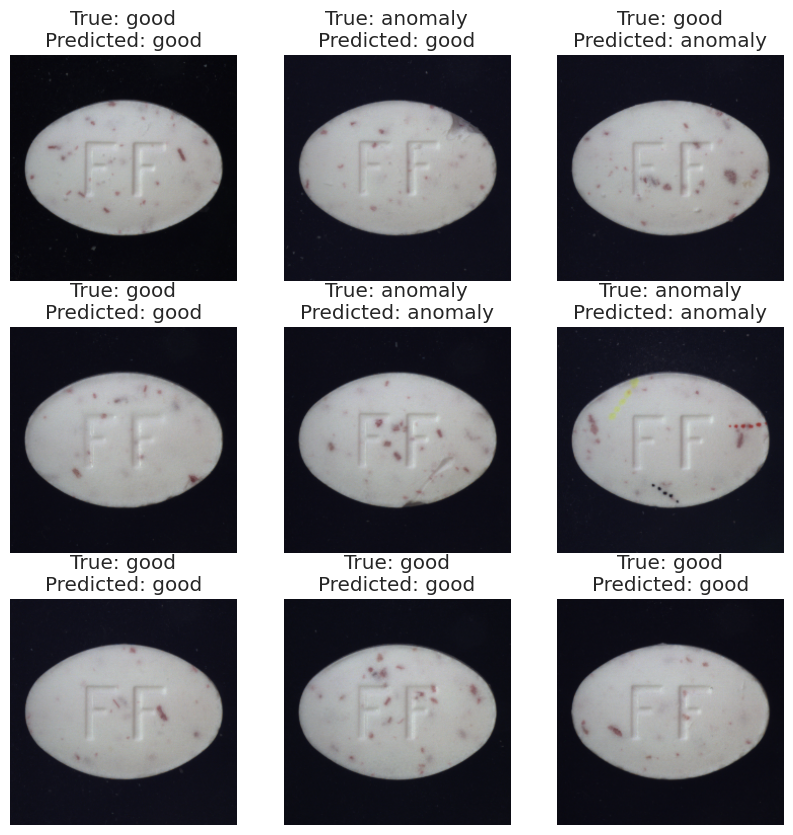

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model2.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  true_label = class_names[label_batch[i]]  # Get the true label
  predicted_label = class_names[predictions[i]]  # Get the predicted label
  title = f"True: {true_label}\nPredicted: {predicted_label}"
  plt.title(title)
  plt.axis("off")

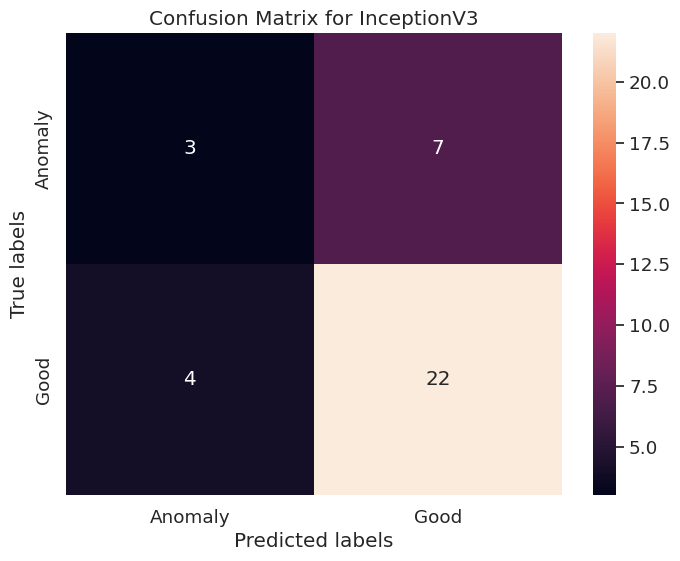

              precision    recall  f1-score   support

     Anomaly      0.429     0.300     0.353        10
        Good      0.759     0.846     0.800        26

    accuracy                          0.694        36
   macro avg      0.594     0.573     0.576        36
weighted avg      0.667     0.694     0.676        36



In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model3.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

confusion_mat = confusion_matrix(label_batch, predictions)
class_labels = ["Anomaly", "Good"]  # Replace with your class labels

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for InceptionV3')
plt.show()

print(classification_report(label_batch, predictions, digits=3, target_names=['Anomaly', 'Good']))

Predictions:
 [0 0 0 1 0 1 1 1 0 1]
Labels:
 [0 1 1 1 0 1 1 1 0 0]


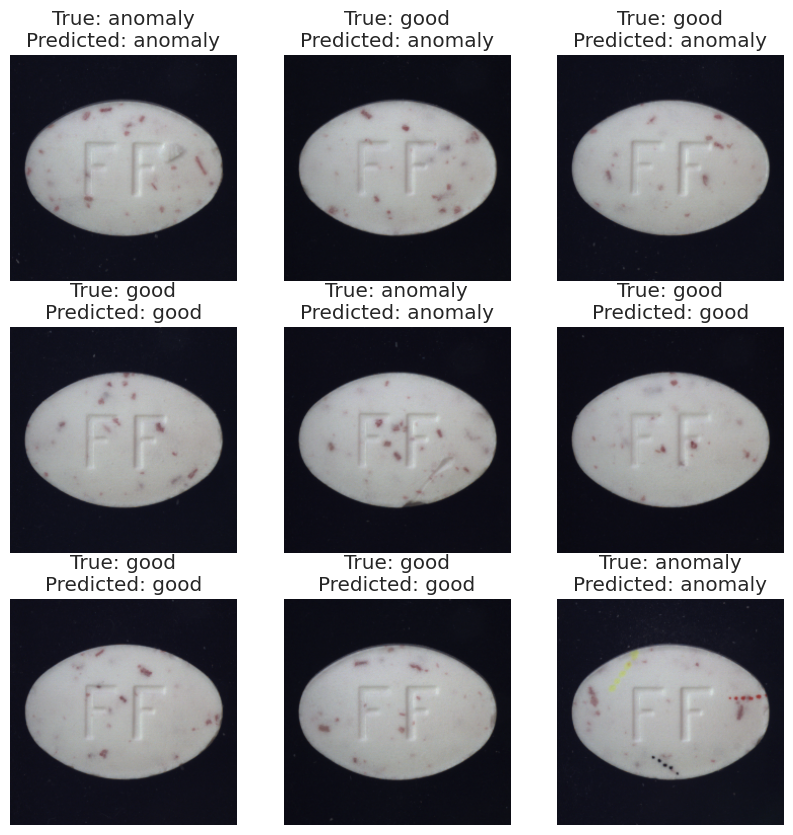

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model3.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  true_label = class_names[label_batch[i]]  # Get the true label
  predicted_label = class_names[predictions[i]]  # Get the predicted label
  title = f"True: {true_label}\nPredicted: {predicted_label}"
  plt.title(title)
  plt.axis("off")

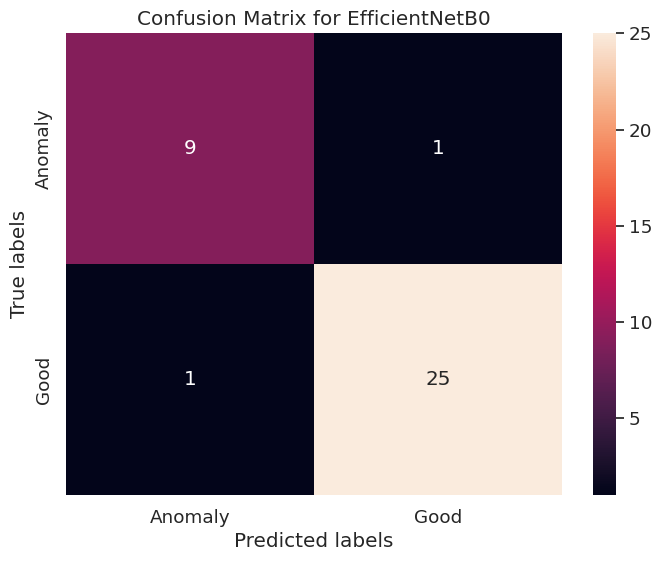

              precision    recall  f1-score   support

     Anomaly      0.900     0.900     0.900        10
        Good      0.962     0.962     0.962        26

    accuracy                          0.944        36
   macro avg      0.931     0.931     0.931        36
weighted avg      0.944     0.944     0.944        36



In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model4.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

confusion_mat = confusion_matrix(label_batch, predictions)
class_labels = ["Anomaly", "Good"]  # Replace with your class labels

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for EfficientNetB0')
plt.show()

print(classification_report(label_batch, predictions, digits=3, target_names=['Anomaly', 'Good']))

Predictions:
 [0 1 1 0 0 1 1 1 1 1]
Labels:
 [0 1 1 0 0 1 1 1 1 1]


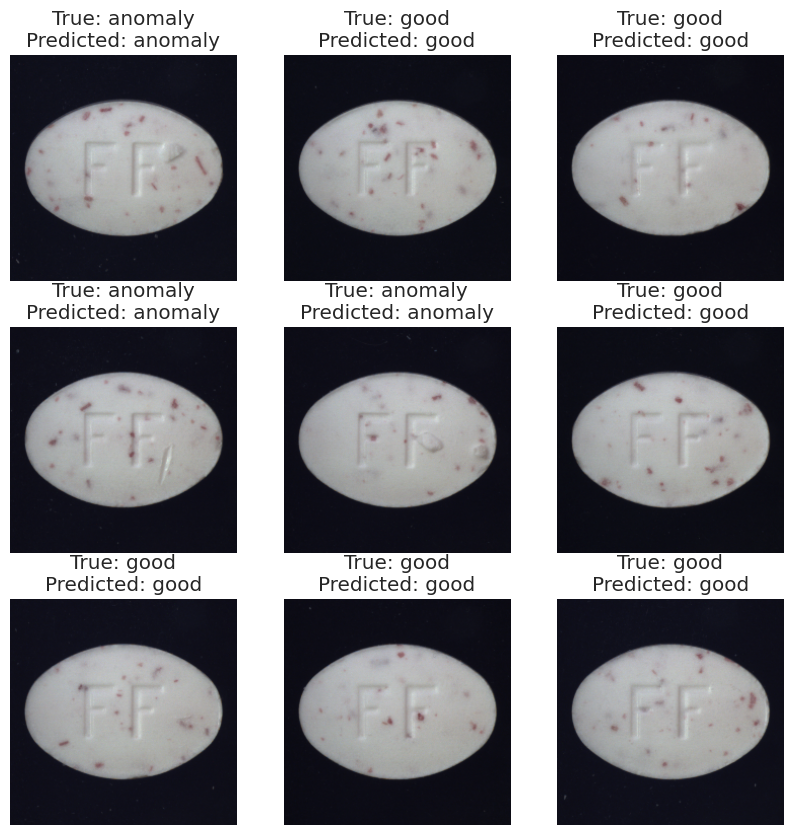

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model4.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  true_label = class_names[label_batch[i]]  # Get the true label
  predicted_label = class_names[predictions[i]]  # Get the predicted label
  title = f"True: {true_label}\nPredicted: {predicted_label}"
  plt.title(title)
  plt.axis("off")

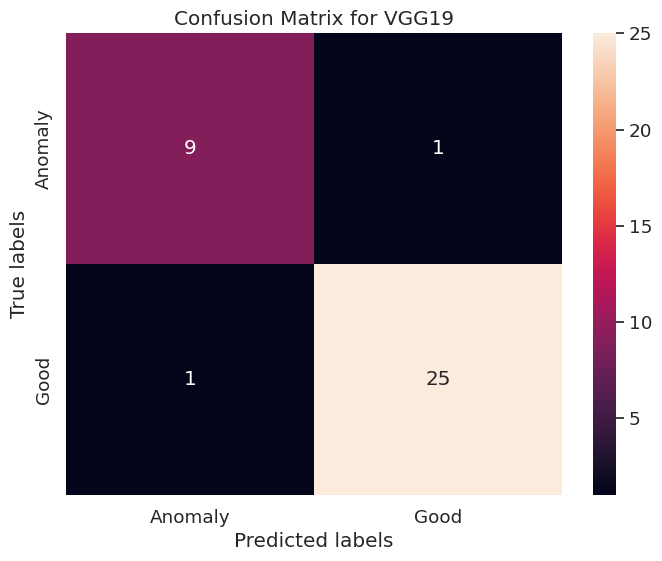

              precision    recall  f1-score   support

     Anomaly      0.900     0.900     0.900        10
        Good      0.962     0.962     0.962        26

    accuracy                          0.944        36
   macro avg      0.931     0.931     0.931        36
weighted avg      0.944     0.944     0.944        36



In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model5.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

confusion_mat = confusion_matrix(label_batch, predictions)
class_labels = ["Anomaly", "Good"]  # Replace with your class labels

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for VGG19')
plt.show()

print(classification_report(label_batch, predictions, digits=3, target_names=['Anomaly', 'Good']))

Predictions:
 [1 1 1 0 1 1 1 1 1 1]
Labels:
 [1 1 1 0 1 1 1 1 1 0]


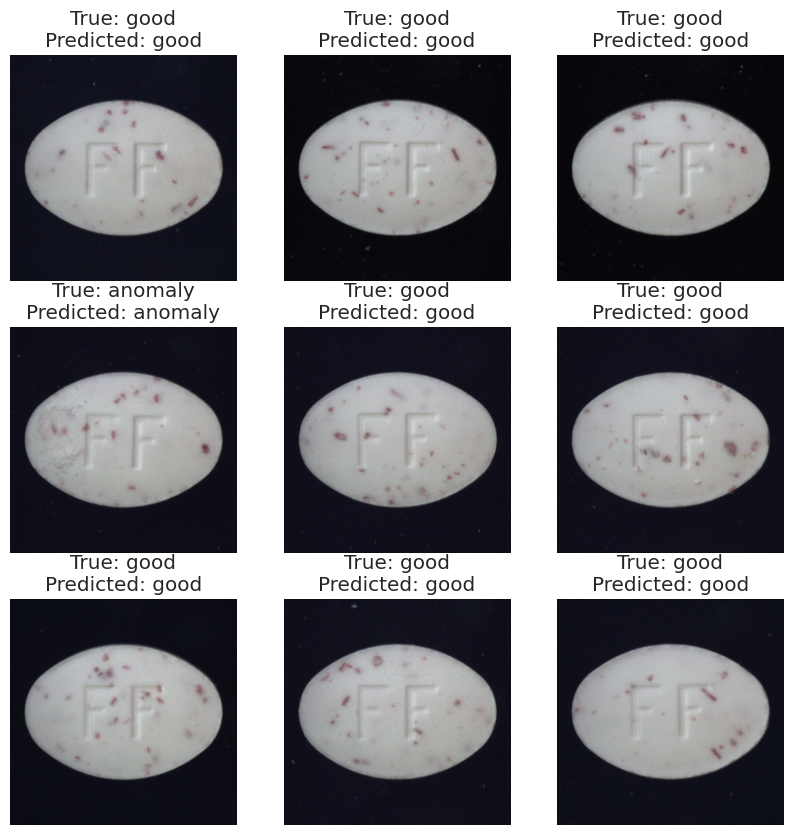

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model5.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  true_label = class_names[label_batch[i]]  # Get the true label
  predicted_label = class_names[predictions[i]]  # Get the predicted label
  title = f"True: {true_label}\nPredicted: {predicted_label}"
  plt.title(title)
  plt.axis("off")

In [ ]:
#train teh best model with the test set
history_final = model1.fit(test_dataset, epochs=10)

In [ ]:
import tf2onnx
#save the model
model1.save("vgg16_custom")
# Load the TensorFlow SavedModel
tf_model_path = "/content/vgg16_custom"
onnx_model_path = "/content/.onnx"

# Convert the TensorFlow model to ONNX format
onnx_model, _ = tf2onnx.convert.from_saved_model(tf_model_path)

# Save the ONNX model to a file
with open(onnx_model_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"Model successfully converted to ONNX and saved to {onnx_model_path}")